In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.transforms as transforms
from datetime import datetime
import collections
import csv
import os.path
import json



In [60]:
df_substance2019 = pd.read_csv('../data/kd2019substance.csv', sep=',')
df_kd2018 = pd.read_csv('../data/kd2018.csv', sep=';')
df_kd2019 = pd.read_csv('../data/kd2019.csv', sep=';')
df_kd2020 = pd.read_csv('../data/kd2020.csv', sep=';')
df_kd2021 = pd.read_csv('../data/kd2021.csv', sep=';')
df_substance2019['leto'] = 2019
df_kd2018['leto'] = 2018
df_kd2019 ['leto'] = 2019
df_kd2020 ['leto'] = 2020
df_kd2021 ['leto'] = 2021
df_substance2019 = df_substance2019.drop_duplicates(["ZaporednaStevilkaKD"])
df_kd2018 = df_kd2018.drop_duplicates(["ZaporednaStevilkaKD"])
df_kd2019 = df_kd2019.drop_duplicates(["ZaporednaStevilkaKD"])
df_kd2020 = df_kd2020.drop_duplicates(["ZaporednaStevilkaKD"])
df_kd2021 = df_kd2021.drop_duplicates(["ZaporednaStevilkaKD"])
kd_all = [df_kd2018, df_kd2019, df_kd2020, df_kd2021, df_substance2019]
"�"

'�'

In [61]:
kd_victims_other = []
for i in range(len(kd_all)):
    kd_all[i] = kd_all[i][kd_all[i]['VrstaOsebe'].notna()]
    kd_victims_other.append((kd_all[i][kd_all[i]['VrstaOsebe'].str.contains('RTEV')],
                             kd_all[i][~kd_all[i]['VrstaOsebe'].str.contains('RTEV')]))

In [62]:
#TODO:
#-katere so vrste krminalnih dejanj D
#-koliko je vsakega kdja
#-koliko je vsakega kdja po letih D
#-koliko je vsakega kdja po letih po obcinah
#-koliko je vsakega kdja po letih po regijah
#-koliko je skupaj vsakega kdja po obcinah
#-koliko je skupaj vsakega kdja po regijah
#-najpogostejsi prostori za vsako kd
#-cas od izvedbe kd do obtozitve za kd
#-poskusi kaj z leti, starostni razred, denarna skoda

In [63]:
frequencysKD = []
frequencysdf = []
dejanja = set()
for zrtev, notvictim in kd_victims_other:
    df_temp = notvictim[['ZaporednaStevilkaKD','OpisKD', 'leto', 'UpravnaEnotaStoritve']]
    df_temp[['OpisKD1', 'OpisKD2']] = df_temp['OpisKD'].str.split(' - ', 1, expand=True)
    frequencys = []
    for idx,name in enumerate(df_temp['OpisKD2'].value_counts().index.tolist()):
        frequencys.append([name, df_temp['OpisKD2'].value_counts()[idx]])
    frequencysKD.append(np.array(frequencys))
    frequencysdf.append(pd.DataFrame(np.array(frequencys), columns=['OpisKD2', 'frequency']))
    dejanja = set(dejanje for dejanje in df_temp['OpisKD2'].unique()).union(dejanja)

frequencysdf_concat = frequencysdf[0]
for i in range(len(frequencysdf)-1):
   frequencysdf_concat = frequencysdf_concat.append(frequencysdf[i+1], ignore_index=True)
frequencysdf_group = frequencysdf_concat.groupby(['OpisKD2'])['frequency'].sum()
print(frequencysdf_group)

c:\Users\Irinej\AppData\Local\Programs\Python\Python38\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


OpisKD2
                                                               11
DAJANJE DARIL ZA NEZAKONITO POSREDOVANJE                   422226
DAJANJE PODKUPNINE                                      124318863
DAV�NA ZATAJITEV                                         23428063
DETOMOR                                                       121
                                                          ...    
ZLORABA ZNAMENJ ZA POMO� IN NEVARNOST                    18142516
�ALJIVA OBDOL�ITEV                                       15131311
�IKANIRANJE NA DELOVNEM MESTU                            24472629
��UVANJE IN JAVNO POVELI�EVANJE TERORISTI�NIH DEJANJ            1
��UVANJE K NASILNI SPREMEMBI USTAVNE UREDITVE                   1
Name: frequency, Length: 209, dtype: object


In [64]:
#kdji po letih po obcinah
temp_dfs = []
for zrtev, notvictim in kd_victims_other:
    df_temp2 = notvictim[['ZaporednaStevilkaKD', 'MesecStoritve', 'UraStoritve', 'DanVTednu', 'Povratnik',
                        'OpisKD', 'leto', 'UpravnaEnotaStoritve', 'PUStoritveKD', 'UporabljenoSredstvo1',
                        'UporabljenoSredstvo2', 'UporabljenoSredstvo3', 'UporabljenoSredstvo4']]
    df_temp2[['OpisKD1', 'OpisKD2']] = df_temp2['OpisKD'].str.split(' - ', 1, expand=True)
    temp_dfs.append(df_temp2)




In [65]:
print(temp_dfs[0]['UpravnaEnotaStoritve'].unique())
print("-----------------------------------------------------------------------------")
print(temp_dfs[0]['PUStoritveKD'].unique())

['CELJE' 'KRANJ' 'LJUBLJANA' '�ALEC' 'GROSUPLJE' 'MARIBOR'
 'SLOVENJ GRADEC' 'MOZIRJE' 'LITIJA' 'KOPER' 'NOVA GORICA'
 'RAVNE NA KORO�KEM' 'VELENJE' 'VRHNIKA' '�ENTJUR PRI CELJU' 'SEVNICA'
 'DRAVOGRAD' 'KAMNIK' 'DOM�ALE' 'RADLJE OB DRAVI' '�KOFJA LOKA' 'IZOLA'
 'KR�KO' 'PIRAN' 'SE�ANA' 'GORNJA RADGONA' 'LA�KO' 'AJDOV��INA' 'TRBOVLJE'
 'NOVO MESTO' 'ILIRSKA BISTRICA' 'JESENICE' 'NEZNANA OB�' 'LENDAVA'
 'LJUTOMER' 'TREBNJE' 'PTUJ' '�RNOMELJ' 'RADOVLJICA' 'ORMO�' 'NEZNANA UE'
 'MURSKA SOBOTA' 'RU�E' '�MARJE PRI JEL�AH' 'LOGATEC' 'RIBNICA' 'POSTOJNA'
 'SLOVENSKE KONJICE' 'LENART' 'KO�EVJE' 'BRE�ICE' 'IDRIJA'
 'SLOVENSKA BISTRICA' 'PESNICA' 'ZAGORJE OB SAVI' 'NI PODATKA' 'TOLMIN'
 'TR�I�' 'HRASTNIK' 'METLIKA' 'CERKNICA']
-----------------------------------------------------------------------------
['PU CELJE' 'PU KRANJ' 'PU LJUBLJANA' 'PU MARIBOR' 'PU KOPER'
 'PU NOVA GORICA' 'PU NOVO MESTO' 'PU MURSKA SOBOTA' 'GPU' 'NI PODATKA']


In [66]:
obcine = {}
policijskeUprave = {}
years = []
for year in temp_dfs:
    obcine = {obcina : pd.DataFrame for obcina in year['UpravnaEnotaStoritve'].unique()}
    policijskeUprave = {policijskaUprava : pd.DataFrame for policijskaUprava in year['PUStoritveKD'].unique()}
    years.append((obcine, policijskeUprave))

count = 0
for obcineOfYear, policijskeUpraveOfYear in years:
    wholeYear = temp_dfs[count]
    for obcina in obcineOfYear:
        obcineOfYear[obcina] = wholeYear[wholeYear['UpravnaEnotaStoritve'] == obcina]
    for policijskaUprava in policijskeUpraveOfYear:
        policijskeUpraveOfYear[policijskaUprava] = wholeYear[wholeYear['PUStoritveKD'] == policijskaUprava]
    count += 1
#najpogostejsi kd po obcinah po letih


In [67]:

print(years[0][0]['CELJE']['OpisKD2'].value_counts().index.tolist()[0])
print(years[0][0]['CELJE']['OpisKD2'].value_counts())

NEUPRAVI�ENA PROIZVODNJA IN PROMET S PREPOVEDANIMI DROGAMI, NEDOVOLJENIMI SNOVMI V �PORTU IN PREDHOD
NEUPRAVI�ENA PROIZVODNJA IN PROMET S PREPOVEDANIMI DROGAMI, NEDOVOLJENIMI SNOVMI V �PORTU IN PREDHOD    126
KR�ITEV TEMELJNIH PRAVIC DELAVCEV                                                                        64
TATVINA                                                                                                  46
NASILJE V DRU�INI                                                                                        41
LAHKA TELESNA PO�KODBA                                                                                   35
                                                                                                       ... 
ZLORABA ZNAMENJ ZA POMO� IN NEVARNOST                                                                     1
PRISILJENJE                                                                                               1
ZLORABA IZVR�BE                    

In [68]:
with open('../data/kazni_dict.json', 'r', encoding='utf8') as kazni:
    kazni_dict = json.load(kazni)

kazni_dict_brezsumnikov = {}
for dejanje in kazni_dict:
    dejanje1 = dejanje.replace('ž', 'z')
    dejanje1 = dejanje1.replace('č', 'c')
    dejanje1 = dejanje1.replace('š', 's')
    kazni_dict_brezsumnikov[dejanje1] = kazni_dict[dejanje]

kds = []
for kd in kazni_dict_brezsumnikov:
    kds.append(kd)

{'dajanje daril za nezakonito posredovanje': {'average_actual_jailtime': 0.26666666666666666, 'dangerousness': 0.1, 'max_jailtime': 6}, 'dajanje podkupnine': {'average_actual_jailtime': 0.704051282051282, 'dangerousness': 0.1, 'max_jailtime': 6}, 'davcna zatajitev': {'average_actual_jailtime': 1.5675777777777777, 'dangerousness': 0, 'max_jailtime': 12}, 'detomor': {'average_actual_jailtime': None, 'dangerousness': 0, 'max_jailtime': 3}, 'dogovor za kaznivo dejanje': {'average_actual_jailtime': 0.46875, 'dangerousness': 0, 'max_jailtime': 1}, 'dvojna zakonska zveza': {'average_actual_jailtime': 0.2085, 'dangerousness': 0, 'max_jailtime': 1}, 'financiranje terorizma': {'average_actual_jailtime': None, 'dangerousness': 0, 'max_jailtime': 15}, 'genocid': {'average_actual_jailtime': None, 'dangerousness': 0, 'max_jailtime': 100}, 'goljufija': {'average_actual_jailtime': 0.8949999999999999, 'dangerousness': 0.25, 'max_jailtime': 10}, 'goljufija na skodo evropske unije': {'average_actual_jail

In [69]:
from itertools import product
def getCombinations(number):
    lst = ['c', 's', 'z']
    return [''.join(x) for x in product(lst, repeat = number)]



def getSentanceOptions(options, initialSentance):
    sentances = []
    for wordOptions, index in options:
        for option in wordOptions:
            initialSentancex = initialSentance
            initialSentancex[index] = option
            sentances.append(' '.join(initialSentancex))
    return sentances



def findMatch(inputSentance, criminalDeads):
    i = 0
    options = []
    for word in inputSentance.lower().split(' '):
        n = word.count('�')
        wordOptions = []
        if n > 0:
            for combination in getCombinations(n):
                cnt = 0
                newWord = ""
                for char in word:
                    if char == '�':
                        char = combination[cnt]
                        cnt += 1
                    newWord += char
                wordOptions.append(newWord)
            options.append((wordOptions, i))
        i += 1

    sentanceOptions = getSentanceOptions(options, inputSentance.lower().split(' '))
    return [sentance for sentance in sentanceOptions if sentance in criminalDeads]

In [70]:
tempdict = {2.5:"sdfasdf", 3.5:"sdfasdf", 1.3:"sdfasdf"}
print(max(tempdict))

3.5


In [74]:
yearsTopKD = []
for obcineOfYear, policijskeUpraveOfYear in years:
    obcineTop = {}
    policijskeUpraveTop = {}
    obcineTopMDT10 = {}             #most dangerouws from top 10
    policijskeUpraveTopMDT10 = {}   #most dangerouws from top 10
    for obcina in obcineOfYear:
        top10kdO = obcineOfYear[obcina]['OpisKD2'].value_counts().index.tolist()[:10]
        x = findMatch(top10kdO[0], kds)
        obcineTop[obcina] = x[0] if len(x) > 0 else top10kdO[0]
        ocenekd = {}
        for kd in top10kdO:
            kdM = findMatch(kd, kds)
            if len(kdM) > 0:
                kdM = kdM[0]
                ocenekd[kazni_dict_brezsumnikov[kdM]['dangerousness']] = kdM
        if len(ocenekd) > 0:
            obcineTopMDT10[obcina] = ocenekd[max(ocenekd)]
        else:
            obcineTopMDT10[obcina] = x[0] if len(x) > 0 else top10kdO[0]

    for policijskaUprava in policijskeUpraveOfYear:
        top10kdP = policijskeUpraveOfYear[policijskaUprava]['OpisKD2'].value_counts().index.tolist()[:10]
        x = findMatch(top10kdP[0], kds)
        policijskeUpraveTop[policijskaUprava] = x[0] if len(x) > 0 else top10kdP[0]
        ocenekd = {}
        for kd in top10kdP:
            kdM = findMatch(kd, kds)
            if len(kdM) > 0:
                kdM = kdM[0]
                ocenekd[kazni_dict_brezsumnikov[kdM]['dangerousness']] = kdM
        if len(ocenekd) > 0:
            policijskeUpraveTopMDT10[policijskaUprava] = ocenekd[max(ocenekd)]
        else:
            policijskeUpraveTopMDT10[policijskaUprava] = x[0] if len(x) > 0 else top10kdP[0]
    yearsTopKD.append((obcineTop, policijskeUpraveTop, obcineTopMDT10, policijskeUpraveTopMDT10))

for i in yearsTopKD:
    for j in range(4):
        print(i[j])

{'CELJE': 'NEUPRAVI�ENA PROIZVODNJA IN PROMET S PREPOVEDANIMI DROGAMI, NEDOVOLJENIMI SNOVMI V �PORTU IN PREDHOD', 'KRANJ': 'TATVINA', 'LJUBLJANA': 'krsitev temeljnih pravic delavcev', '�ALEC': 'NEUPRAVI�ENA PROIZVODNJA IN PROMET S PREPOVEDANIMI DROGAMI, NEDOVOLJENIMI SNOVMI V �PORTU IN PREDHOD', 'GROSUPLJE': 'GOLJUFIJA', 'MARIBOR': 'NEUPRAVI�ENA PROIZVODNJA IN PROMET S PREPOVEDANIMI DROGAMI, NEDOVOLJENIMI SNOVMI V �PORTU IN PREDHOD', 'SLOVENJ GRADEC': 'TATVINA', 'MOZIRJE': 'ZANEMARJANJE MLADOLETNE OSEBE IN SUROVO RAVNANJE', 'LITIJA': 'NEUPRAVI�ENA PROIZVODNJA IN PROMET S PREPOVEDANIMI DROGAMI, NEDOVOLJENIMI SNOVMI V �PORTU IN PREDHOD', 'KOPER': 'NEUPRAVI�ENA PROIZVODNJA IN PROMET S PREPOVEDANIMI DROGAMI, NEDOVOLJENIMI SNOVMI V �PORTU IN PREDHOD', 'NOVA GORICA': 'NEUPRAVI�ENA PROIZVODNJA IN PROMET S PREPOVEDANIMI DROGAMI, NEDOVOLJENIMI SNOVMI V �PORTU IN PREDHOD', 'RAVNE NA KORO�KEM': 'ZANEMARJANJE MLADOLETNE OSEBE IN SUROVO RAVNANJE', 'VELENJE': 'krsitev temeljnih pravic delavcev', 'VR

In [72]:
#                                               OpisKD2 frequency
#0                                              TATVINA      5607
#1                    KR�ITEV TEMELJNIH PRAVIC DELAVCEV      4024
#2                                            GOLJUFIJA      3120
#3                                       VELIKA TATVINA      2662
#4    NEUPRAVI�ENA PROIZVODNJA IN PROMET S PREPOVEDA...      2066
#..                                                 ...       ...
#170                             ONESNA�ENJE PITNE VODE         1
#171  PROTIPRAVNA PRILASTITEV STVARI OB PREISKAVI AL...         1
#172                             KR�ITEV ENAKOPRAVNOSTI         1
#173  KR�ITEV PRAVICE DO PRAVNEGA SREDSTVA ALI PETICIJE         1
#174                                                            1


#                                               OpisKD2 frequency
#0                    KR�ITEV TEMELJNIH PRAVIC DELAVCEV      6069
#1                                              TATVINA      5729
#2                                            GOLJUFIJA      3482
#3                                       VELIKA TATVINA      2522
#4                                   PONAREJANJE LISTIN      1752
#..                                                 ...       ...
#167      ��UVANJE K NASILNI SPREMEMBI USTAVNE UREDITVE         1
#168  SRAMOTITEV SLOVENSKEGA NARODA ALI NARODNIH SKU...         1
#169            OGRO�ANJE OSEB POD MEDNARODNIM VARSTVOM         1
#170  IZDELAVA, PRIDOBITEV IN ODTUJITEV PRIPOMO�KOV ...         1
#171                         ONESNA�ENJE �IVIL ALI KRME         1



#                                              OpisKD2 frequency
#0                                             TATVINA      5706
#1                   KR�ITEV TEMELJNIH PRAVIC DELAVCEV      4650
#2                                           GOLJUFIJA      2697
#3                                      VELIKA TATVINA      2490
#4                                             GRO�NJA      2079
#..                                                ...       ...
#162                                        SRAMOTITEV         1
#163                            FINANCIRANJE TERORIZMA         1
#164                      ZLORABA NOTRANJE INFORMACIJE         1
#165  O�ITANJE KAZNIVEGA DEJANJA Z NAMENOM ZANI�EVANJA         1
#166       MALOMARNO OPRAVLJANJE LEKARNI�KE DEJAVNOSTI         1

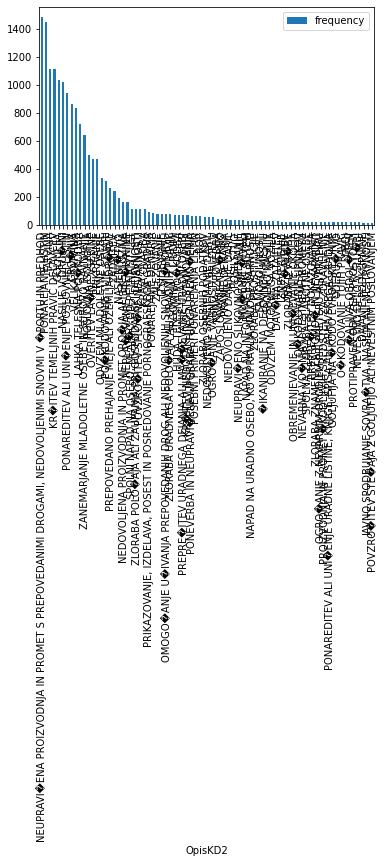

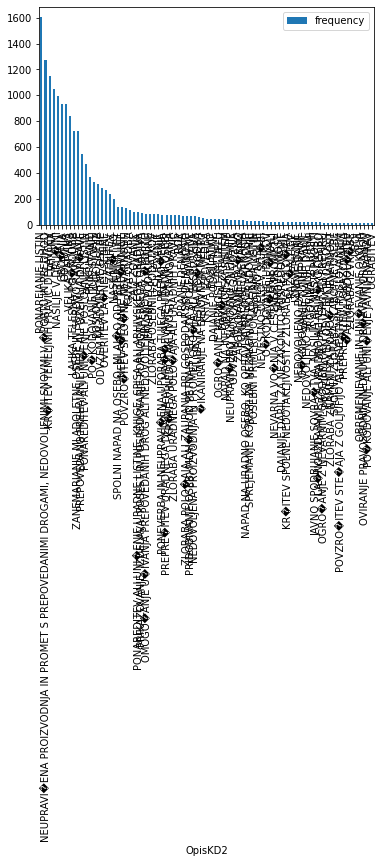

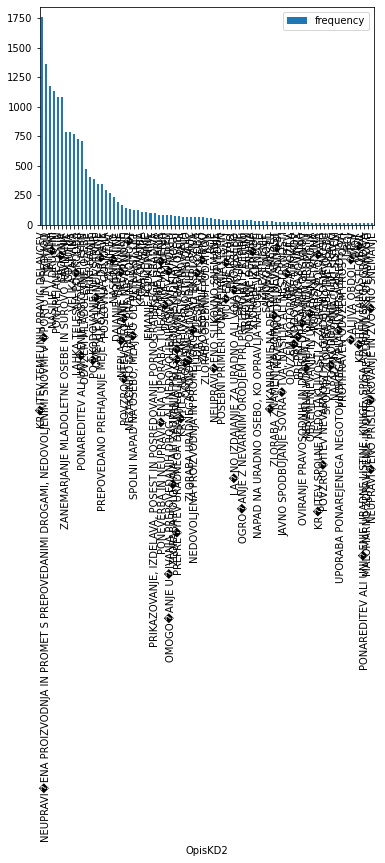

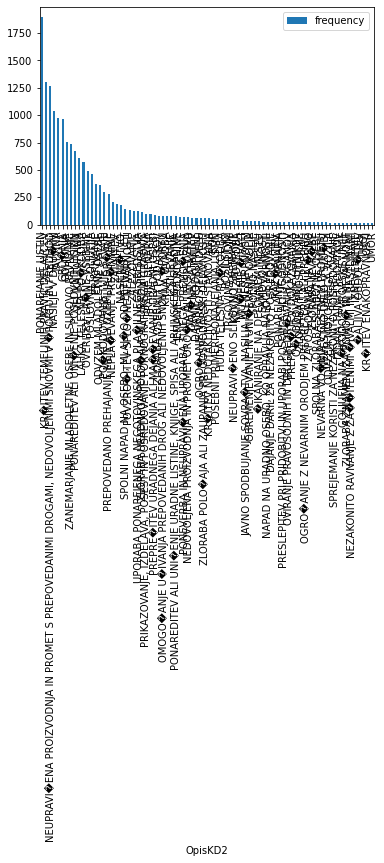

c:\Users\Irinej\AppData\Local\Programs\Python\Python38\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 142 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\Users\Irinej\AppData\Local\Programs\Python\Python38\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 142 missing from current font.
  font.set_text(s, 0, flags=flags)


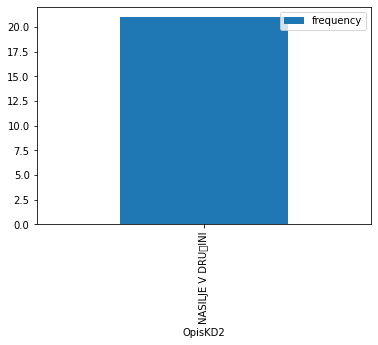

In [73]:
abovex = []
x = 10
for i in range(len(frequencysKD)):
    #pd.DataFrame(frequencysKD[i], columns=['OpisKD', 'frequency']['frequency']>x)
    temp_df = pd.DataFrame(frequencysKD[i], columns=['OpisKD2', 'frequency'])
    temp_df['frequency'] = temp_df['frequency'].astype(int)
    abovex.append(temp_df[temp_df['frequency'] > x])

for df in abovex:
    df.plot(x='OpisKD2', y='frequency', kind='bar')